## Import

In [17]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [32]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_ , _ ) = fashion_mnist.load_data()

# Get only a subpart of the dataset
# Get only a subpart
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

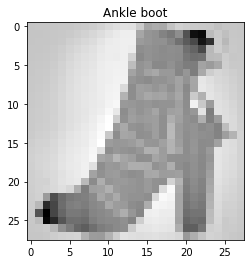

In [24]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Add the layers

In [33]:
# Flatten
model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))

# Add 3 layers, 
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))



## Model Summary

In [39]:
#display the summary of your model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [36]:
# Compile the model with the appropriate loss function and with sgd optimizer
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [40]:
#train your model. The number of itérations is 10.
history = model.fit(images, targets, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2401 - accuracy: 0.9230 - val_loss: 0.2475 - val_accuracy: 0.9160
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2262 - accuracy: 0.9229 - val_loss: 0.2570 - val_accuracy: 0.9140
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.2131 - accuracy: 0.9305 - val_loss: 0.2529 - val_accuracy: 0.9110
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2019 - accuracy: 0.9345 - val_loss: 0.2537 - val_accuracy: 0.9070
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1904 - accuracy: 0.9360 - val_loss: 0.2552 - val_accuracy: 0.9045
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1813 - accuracy: 0.9413 - val_loss: 0.2592 - val_accuracy: 0.9080
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1715 - accuracy: 0.9474 - val_loss: 0.2609 - val_accuracy: 0.9065
Epoch 

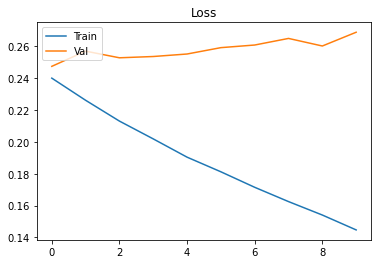

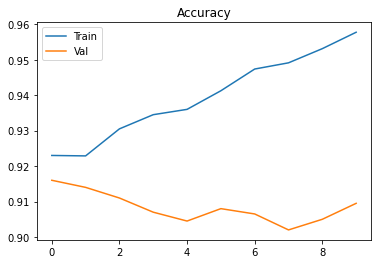

In [41]:
#display loss and accuracy curves
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve, label="Train")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()